In [75]:
import numpy as np
import scipy.stats as stats
import scipy
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pylab as pylab
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.weightstats import *
import itertools



In [21]:
%matplotlib inline

In [22]:
data = pd.read_csv('diamonds.txt', sep='\t')

In [23]:
data

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
6,0.24,62.3,57.0,336,3.95,3.98,2.47
7,0.26,61.9,55.0,337,4.07,4.11,2.53
8,0.22,65.1,61.0,337,3.87,3.78,2.49
9,0.23,59.4,61.0,338,4.00,4.05,2.39


In [24]:
X = data[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = data['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [26]:
rf = RandomForestRegressor(random_state = 1)
lr = LinearRegression()

In [27]:
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
y_rf = rf.predict(X_test)
y_lr = lr.predict(X_test)

In [29]:
dev_y_rf = np.abs(y_rf-y_test)
dev_y_lr = np.abs(y_lr-y_test)
dev_y_lr.head()

2714      214.422356
14653    1016.460537
52760      41.878717
48658       7.165645
14812    1113.152701
Name: price, dtype: float64

In [30]:
dev_y_rf = np.array(dev_y_rf)
dev_y_lr = np.array(dev_y_lr)
print dev_y_lr

[  214.42235621  1016.46053685    41.87871693 ...,  2171.49180326
   103.82818096   159.32529706]


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   8.00000000e+00,
          7.00000000e+00,   1.50000000e+01,   1.80000000e+01,
          1.90000000e+01,   1.60000000e+01,   1.90000000e+01,
          4.10000000e+01,   4.40000000e+01,   6.10000000e+01,
          9.70000000e+01,   1.19000000e+02,   1.43000000e+02,
          1.68000000e+02,   2.78000000e+02,   4.11000000e+02,
          6.77000000e+02,   1.29900000e+03,   3.00100000e+03,
          2.78400000e+03,   1.74600000e+03,   9.06000000e+02,
          5.45000000e+02,   3.36000000e+02,   2.34000000e+02,
          1.27000000e+02,   8.90000000e+01,   7.00000000e+01,
          5.30000000e+01,   3.50000000e+01,   2.00000000e+01,
          2.60000000e+01,   1.70000000e+01,   5.00000000e+00,
          1.00000000e+01,   1.00000000e+01,   3.00000000e+00,
        

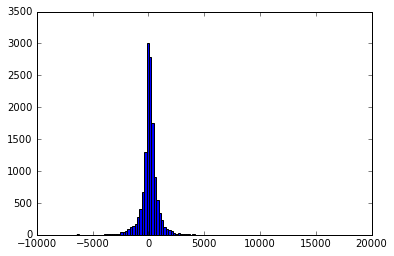

In [31]:
pylab.hist(dev_y_lr - dev_y_rf, bins =100)

NameError: name 'plt' is not defined

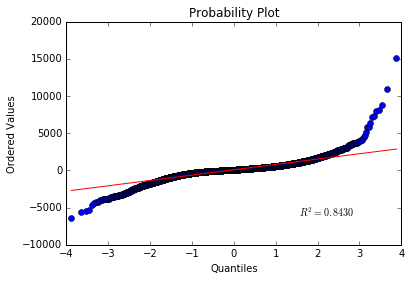

In [32]:
stats.probplot(dev_y_lr - dev_y_rf, dist = "norm", plot = pylab)
plt.show()

In [ ]:
stats.shapiro(dev_y_lr - dev_y_rf)

In [ ]:
stats.ttest_rel(dev_y_lr, dev_y_rf)

In [ ]:
DescrStatsW(dev_y_lr - dev_y_rf).tconfint_mean()

In [ ]:
sleepy = np.zeros(34)

In [ ]:
sleepy[0:10] = 1

In [ ]:
not_sleepy = np.zeros(16)
not_sleepy[0:4] = 1

In [ ]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [ ]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [33]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [34]:
proportions_diff_confint_ind(sleepy, not_sleepy)

NameError: name 'proportions_diff_confint_ind' is not defined

In [35]:
proportions_diff_z_test(proportions_diff_z_stat_ind(sleepy, not_sleepy), alternative='greater')

NameError: name 'proportions_diff_z_stat_ind' is not defined

In [36]:
data = pd.read_csv('banknotes.txt', sep='\t')

In [37]:
data.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [38]:
X1 = data[['X1', 'X2', 'X3']]
X2 = data[['X4', 'X5', 'X6']]
y = data['real']

In [39]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.25, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.25, random_state = 1)

In [40]:
log1 = LogisticRegression()
log2 = LogisticRegression()

In [41]:
log1.fit(X1_train, y1_train)
log2.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
y1_res = log1.predict(X1_test)
y2_res = log2.predict(X2_test)

In [43]:
y1_dev = np.abs(y1_res - y1_test)
y2_dev = np.abs(y2_res - y2_test)

In [44]:
y2_dev = np.array(y2_dev)
y1_dev = np.array(y1_dev)

In [45]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [46]:
proportions_diff_z_test(proportions_diff_z_stat_rel(y2_dev, y1_dev))

0.0032969384555543435

In [47]:
y2_dev - y1_dev

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
       -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0])

In [48]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [49]:
proportions_diff_confint_rel(y1_dev, y2_dev)

(0.059945206279614305, 0.30005479372038568)

In [51]:
data = pd.read_csv('challenger.txt', sep = '\t')

In [53]:
data.head()

,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [54]:
temp0 = data['Temperature'][data.Incident == 0]
temp1 = data['Temperature'][data.Incident == 1]


In [56]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [78]:
np.random.seed(0)
temp0s = get_bootstrap_samples(temp0.as_matrix(), 1000)
temp1s = get_bootstrap_samples(temp1.as_matrix(), 1000)


(array([   6.,   18.,   81.,  165.,  258.,  229.,  152.,   58.,   23.,   10.]),
 array([ 20.25625,  20.6625 ,  21.06875,  21.475  ,  21.88125,  22.2875 ,
         22.69375,  23.1    ,  23.50625,  23.9125 ,  24.31875]),
 <a list of 10 Patch objects>)

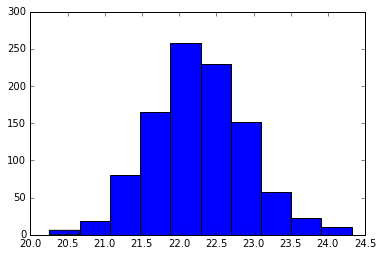

In [79]:
pylab.hist(temp0s.mean(axis = 1))

(array([  11.,   53.,   79.,  176.,  226.,  202.,  134.,   81.,   32.,    6.]),
 array([ 13.18571429,  14.09714286,  15.00857143,  15.92      ,
         16.83142857,  17.74285714,  18.65428571,  19.56571429,
         20.47714286,  21.38857143,  22.3       ]),
 <a list of 10 Patch objects>)

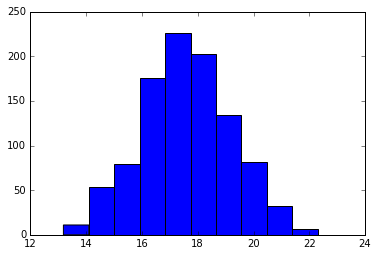

In [80]:
pylab.hist(temp1s.mean(axis = 1))

In [84]:
sub = - temp0s.mean(axis = 1) + temp1s.mean(axis = 1)

(array([  10.,   41.,  100.,  219.,  228.,  205.,  133.,   52.,    5.,    7.]),
 array([-9.55714286, -8.48517857, -7.41321429, -6.34125   , -5.26928571,
        -4.19732143, -3.12535714, -2.05339286, -0.98142857,  0.09053571,
         1.1625    ]),
 <a list of 10 Patch objects>)

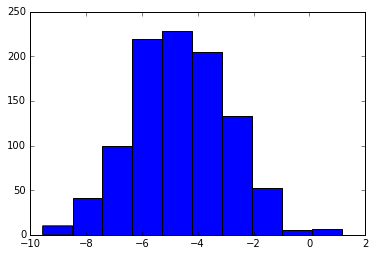

In [85]:
pylab.hist(sub)

In [86]:
zconfint(sub)

(-4.7392318772103428, -4.5262556227896544)

In [69]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [70]:
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [71]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [72]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [73]:
np.random.seed(0)
temp0s = get_bootstrap_samples(temp0.as_matrix(), 10000)
temp1s = get_bootstrap_samples(temp1.as_matrix(), 10000)


In [77]:
np.random.seed(0)
permutation_test(temp0.as_matrix(), temp1.as_matrix(), max_permutations=10000)

0.007